## DBSCAN
クラスタリングアルゴリズムの１つ.  
１.点を３つに分類する  
    ・Core Points ：半径ε以内に少なくともminPts個の隣接点を持つ点  
    ・Reachable Points ：半径ε以内にminPts個ほどは隣接点は無いが、半径ε以内にCore Potntsを持つ点  
    ・Outlier :半径ε以内に隣接点が無い点  
2.Core Pointsの集まりからクラスタを作成し、Reachable Pointsを各クラスタに割り当てる  

Strengths  
    ・k-meansと違って、最初にクラスタ数を決めなくて良い  
    ・とがったクラスタでも分類できる。クラスタが球状であることを前提としない  
    ・outlierに対してrobustである  
    ・パラメータがεとminPtsという２つで良い。また、パラメータ範囲も判断しやすい。  
Weaknesses  
    ・Border Pointsの概念が微妙で、データによりどのクラスタに属するか変わる可能性がある  
    ・距離の計算方法により、精度が変わる  
    ・データが密集していると適切にεとminPtsを決めるのが難しい。ほとんどの点を一つのクラスタに分類してしまう場合もある  
    ・データがわからないとεを決めるのが難しい  

In [1]:
import pandas as pd
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [3]:
#iris datasets import
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = pd.DataFrame(iris.data,columns = iris.feature_names) #Sepal Length,Sepal Width,Petal Length,Petal Width
iris_target = pd.Series(data = iris.target) #Variety

In [4]:
iris_data.head(n=5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris_target.head(n=5)

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [6]:
X = iris.data
y = iris.target

In [7]:
model = DBSCAN(eps = 0.8, min_samples = 19).fit(X)
print(model)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=19, n_jobs=None, p=None)


## Visualize resault

In [8]:
outliers_df = pd.DataFrame(X)

print(Counter(model.labels_))
print(outliers_df[model.labels_ == -1])

Counter({1: 94, 0: 50, -1: 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


Text(0.5, 1.0, 'DBSCAN for Outlier Detection')

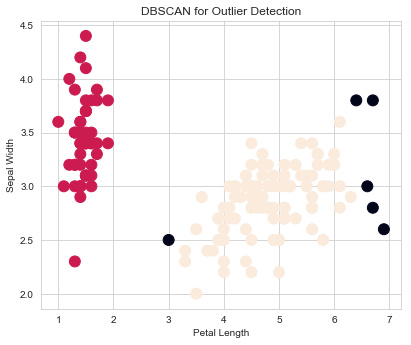

In [9]:
#x:Petal Length y:Sepal Width
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
colors = model.labels_
ax.scatter(X[:,2], X[:,1],c=colors,s=120)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('DBSCAN for Outlier Detection')

Text(0.5, 1.0, 'DBSCAN for Outlier Detection')

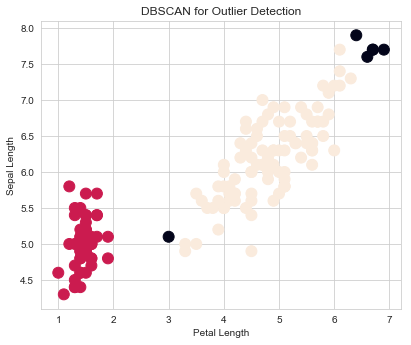

In [10]:
#x:Petal Length y:Sepal Length
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
colors = model.labels_
ax.scatter(X[:,2], X[:,0],c=colors,s=120)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Length')
plt.title('DBSCAN for Outlier Detection')

Text(0.5, 1.0, 'DBSCAN for Outlier Detection')

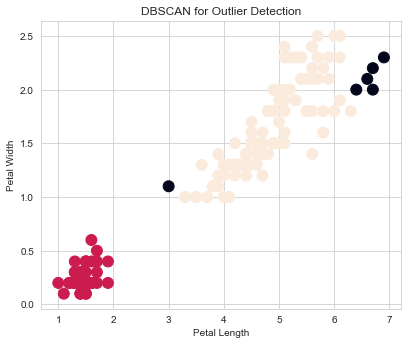

In [11]:
#x:Petal Length y:Sepal Length
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
colors = model.labels_
ax.scatter(X[:,2], X[:,3],c=colors,s=120)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
plt.title('DBSCAN for Outlier Detection')

Text(0.5, 1.0, 'DBSCAN for Outlier Detection')

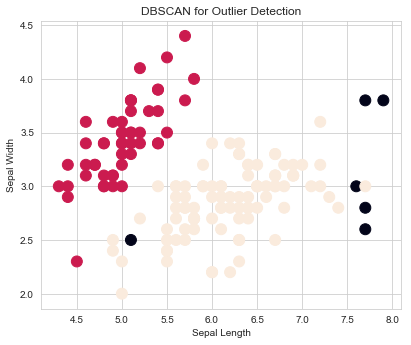

In [12]:
#x:Sepal Length y:Sepal Width
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
colors = model.labels_
ax.scatter(X[:,0], X[:,1],c=colors,s=120)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
plt.title('DBSCAN for Outlier Detection')

Text(0.5, 1.0, 'DBSCAN for Outlier Detection')

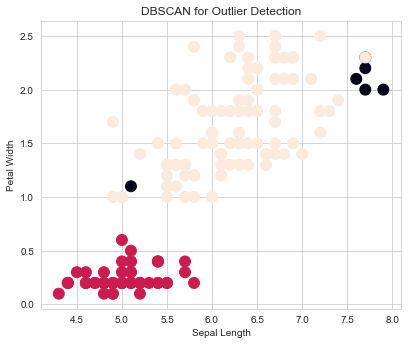

In [13]:
#x:Sepal Length y:Petal Width
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
colors = model.labels_
ax.scatter(X[:,0], X[:,3],c=colors,s=120)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Petal Width')
plt.title('DBSCAN for Outlier Detection')

## Fuzzy clustering  

ファジィクラスタリングでは０〜１の範囲で記述することができる。　　

そのため曖昧で柔軟な表現が可能になる　　

複数のクラスタに所属することができる　　

In [16]:
from fcmeans import FCM
from seaborn import scatterplot as scatter

In [17]:
fcm = FCM(n_clusters=3)
fcm.fit(X)

In [19]:
fcm_centers = fcm.centers
fcm_labels = fcm.u.argmax(axis=1)

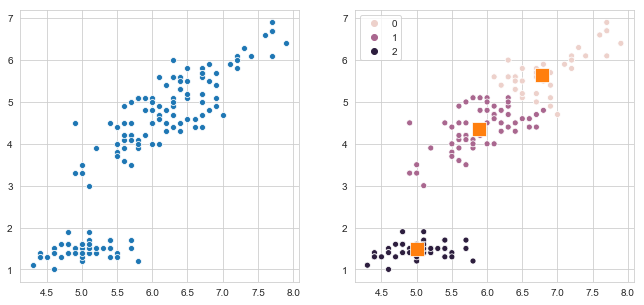

In [25]:
#x:Sepal Length y:Petal Length
f,axes = plt.subplots(1,2,figsize=(11,5))
scatter(X[:,0],X[:,2],ax=axes[0])
scatter(X[:,0],X[:,2],ax=axes[1],hue=fcm_labels)
scatter(fcm_centers[:,0],fcm_centers[:,2],ax=axes[1],marker='s',s=200)
plt.show()